c:\Users\rouba\Documents\python_projects\OptiAlpha\.venv\Lib\site-packages\arviz\__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(
WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta, sigma]
Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 194 seconds.


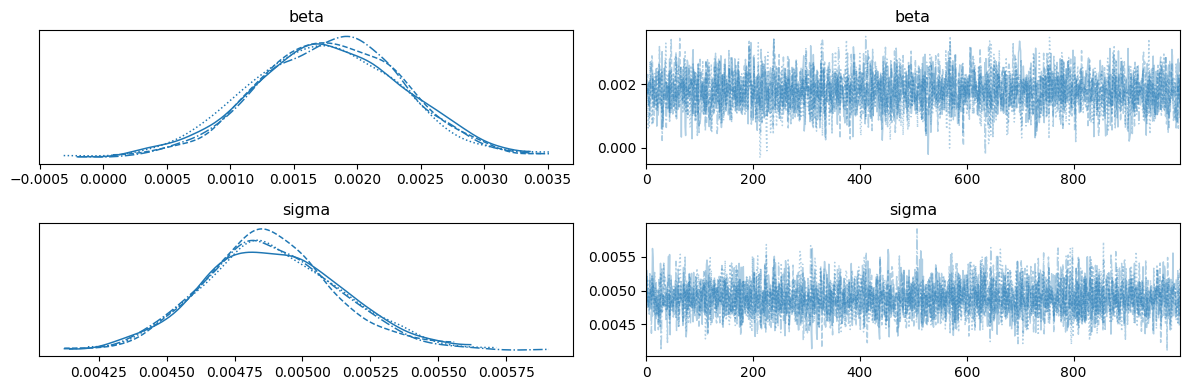


--- Parameter Recovery ---
       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta  0.002  0.001   0.001    0.003        0.0      0.0    3380.0    2685.0   

      r_hat  
beta    1.0  


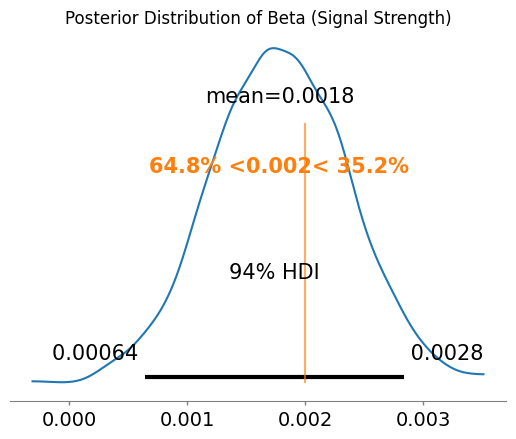

In [1]:
# Cell 1: Setup
import sys
import os
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Path Discovery
current_dir = os.getcwd()
if current_dir.endswith("notebooks"):
    sys.path.append(os.path.abspath(os.path.join(current_dir, "..")))
else:
    sys.path.append(current_dir)

from src.model.bayesian_alpha import BayesianAlphaModel

# Cell 2: Synthetic Regime Generation
# We simulate a relationship to test if the model can "learn" it.
np.random.seed(42)
days = 200
sentiment = np.random.uniform(-1, 1, days)
# Ground Truth: Return = 0.05% + (0.2% * Sentiment) + Noise
returns = 0.0005 + (0.0020 * sentiment) + np.random.normal(0, 0.005, days)

df_sim = pd.DataFrame({'Sentiment': sentiment, 'Returns': returns})

# Cell 3: Model Fitting
model = BayesianAlphaModel(n_samples=1000)
# Feed the data into PyMC
model.fit(df_sim['Returns'], df_sim['Sentiment'])

# Cell 4: Diagnostic Plots (Trace)
# Senior Check: Do the chains look like "fuzzy caterpillars"? (Good mixing)
az.plot_trace(model.trace, var_names=["beta", "sigma"])
plt.tight_layout()
plt.show()

# Cell 5: Posterior Analysis
# Did we recover the true beta of 0.0020?
summary = az.summary(model.trace, var_names=["beta"])
print("\n--- Parameter Recovery ---")
print(summary)

az.plot_posterior(model.trace, var_names=["beta"], ref_val=0.0020)
plt.title("Posterior Distribution of Beta (Signal Strength)")
plt.show()